# V Backpropagation algorithm

<code>**Backpropagation**</code> is neural-network terminology for minimizing our cost function, just like what we were doing with gradient descent in logistic and linear regression.<br>
Simply this is the algorithm that minimize the cost function 𝐽(Θ) in NN. 

<code>**Cost function**</code>

\begin{multline*}
J(\Theta) = -\dfrac{1}{m} [ \sum_{y=1}^m \ \sum_{k=1}^K y_{k}^{(i)}log(h_{\theta}(x^{(i)}))_{k} + (1-y_{k}^{(i)})log(1 - h_{\theta}(x^{(i)}))_{k})] + \dfrac{\lambda}{2m} \sum_{l=1}^{L-1} \ \sum_{i=1}^{s_{l}} \ \sum_{j=1}^{s_{l+1}}\ (\Theta_{j, i}^{(l)})^2
\end{multline*}

\begin{multline*}
\min_{\Theta}J(\Theta)
\end{multline*}

<code>**We need to compute**</code>

\begin{multline*}
J(\Theta)
\end{multline*}

\begin{multline*}
\dfrac{\partial}{\partial\Theta^{(l)}_{ij}} \ J(\Theta)
\end{multline*}

We can either <code>**gradient descent**</code> or other advanced optimization algorithms. Therefore we need to write code that takes this input the parameters of Θ and computes 𝐽(Θ) and these partial derivative terms.

<code>**NOTE!:**</code> parameters of NN are these and thats a real number:

\begin{multline*}
\Theta^{(l)}_{ij} \in \mathbb{R}
\end{multline*}

<code>**Gradient computation**</code>

Given the case with one training example:

\begin{multline*}
(x^{1}, y^{1})
\end{multline*}

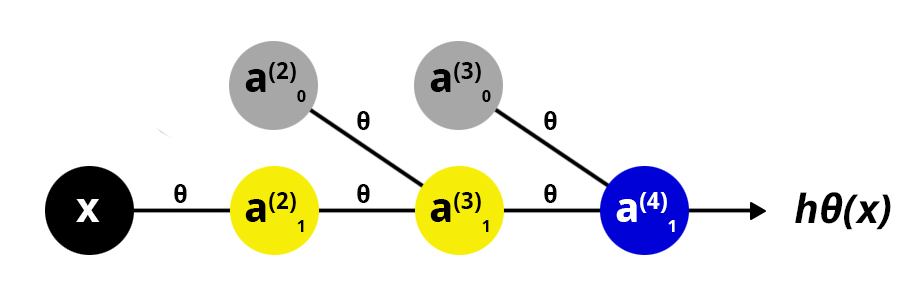

<code>**1) Apply forward propagation**</code><br>
<code>**Vecotrized implementation**</code>
\begin{multline*}
a^{(1)} = x
\end{multline*}
\begin{multline*}
z^{(2)} = \Theta^{(1)}a^{(1)}
\end{multline*}
\begin{multline*}
a^{(2)} = g(z^{(2)}) \ (\text{add} \ a_0^{(2)})
\end{multline*}
\begin{multline*}
z^{(3)} = \Theta^{(2)}a^{(2)}
\end{multline*}
\begin{multline*}
a^{(3)} =  g(z^{(3)}) \ (\text{add} \ a_0^{(3)})
\end{multline*}
\begin{multline*}
z^{(4)} = \Theta^{(3)}a^{(3)}
\end{multline*}
\begin{multline*}
a^{(4)} =g(z^{(4)}) = h_{\Theta}(x)
\end{multline*}


This allows us to compute the activation values for all of the neurons in our network.

## Gradient computation: Backpropagation algorithm

<code>**2) Next in order to compute the derivatives we are going to use an algorithm called Backpropagation**</code>.

If we consider simple non-multiclass <code>**classification (k = 1)**</code> and disregard regularization, the cost is computed with:

\begin{multline*}
cost(i) = y^{(i)}log(h_{\theta}(x^{(i)}) + (1 - y^{(i)})log(1- h_{\theta}(x^{(i)}))
\end{multline*}

<code>**Intuitively, 𝛿(l)j is the "error" for a(l)j (unit j in layer l)**</code>

\begin{multline*}
\delta^{(l)}_{j} = \ \text{error of node} \ j \ \text{in layer} \ l
\end{multline*}

\begin{multline*}
\delta^{(l)}_{j} = \ \text{error of node} \ j \ \text{in layer} \ l
\end{multline*}

More formally, the delta values are actually the <code>**derivative of the cost function**</code>

\begin{multline*}
\delta^{(l)}_{j} = \dfrac{\partial}{\partial z^{(l)}_{j}}cost(i)
\end{multline*}

<code>**Recall that our derivative is the slope of a line tangent to the cost function, so the steeper the slope the more incorrect we are**</code>

For each node we are going to compute the term <code>**𝛿**</code> and that represent the error of the particular <code>**node j in layer l**</code>.
<br>

<code>**Activation node**</code> the j unit in layer l.

\begin{multline*}
a^{(l)}_{j} 
\end{multline*}

<code>**Node error**</code> 

\begin{multline*}
\delta^{(l)}_{j} 
\end{multline*}

<code>**NN**</code>
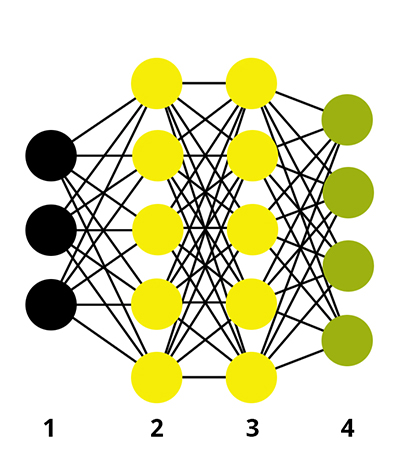

For each output unit (layer <code>**L = 4**</code>) we are going to compute this <code>**delta**</code> term. So delta for j unit in 4'th layer is eqaul to just the activation of that unit minus what was the actual value that was obeserved in our training example.

\begin{multline*}
\delta^{(4)}_{j}  = a^{(4)}_{j} - y_{j}
\end{multline*}


\begin{multline*}
a^{(4)}_{j}  = (h_{\Theta}(x))_{j}
\end{multline*}

So this delta term is the difference between our hypotheses output and what was the value of y in our training set.

<code>**Vectorized implementation**</code>

\begin{multline*}
\delta^{(4)} = a^{(4)} - y
\end{multline*}

Just bare in mind that <code>**𝛿, 𝑎, 𝑦 each of these is vector whose dimension is equal to the number of output units in our network.**</code>

<code>**3) Compute the delta terms for earlier layers of our network**</code>

\begin{multline*}
\delta^{(3)} = (\Theta^{(3)})^{\top} \delta^{(4)} \odot  g’(z^{(3)})
\end{multline*}

\begin{multline*}
\delta^{(2)} = (\Theta^{(2)})^{\top} \delta^{(3)} \odot  g’(z^{(2)})
\end{multline*}

<code>.∗ or ⊙</code> is the [element-wise multiplication operation](http://www.glue.umd.edu/afs/glue.umd.edu/system/info/olh/Numerical/Matlab_Matrix_Manipulation_Software/Matrix_Vector_Operations/elementwise) a.k.a <code>**Hadamard product or Schur product**</code>

In [93]:
import numpy as np

In [94]:
x = np.array([1,2,3])
y = np.array([5,6,2])

In [95]:
x, y

(array([1, 2, 3]), array([5, 6, 2]))

In [103]:
w = x+y
w

array([6, 8, 5])

In [102]:
# c = np.array([[1,4,2], [3,2,1]]).T
# d = np.array([1,2])
# e = c.dot(d)
# e

array([7, 8, 4])

In [104]:
# either way works
# d = x.dot(y)
d = np.dot(x,y)
d

23

<code>**[Hadamard product implementation in numpy](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html)**</code>

In [105]:
# either way works
# m = x * y
m = np.multiply(x,y)
m

array([ 5, 12,  6])

In [ ]:
def sigmoid(x):
    return (1.0 / 1.0 + np.exp(-z))

This term <code>**g’**</code> that formally is the <code>**derivative of the activation function g**</code> evaluated at input values

\begin{multline*}
g’(x) = \dfrac{d}{dx} \ g(x) = g(x) * (1-g(x)) 
\end{multline*}

In [109]:
def pr_sigmoid(x):
    m,n = x.shape
    ones = np.ones(m)
    return np.multiply(sigmoid(x),(ones - sigmoid(x)))

This g prime of z terms <code>**is the derivative of the activation function g evaluated at the input values given by z**</code>

\begin{multline*}
g’(z^{(l)})
\end{multline*}

One way to calculate it would like:


\begin{multline*}
 g’(z^{(l)}) = a^{(l)} \odot  (1 - a^{(l)})
\end{multline*}

\begin{multline*}
a^{(l)} = \text{vector of activations for specific layer}
\end{multline*}
\begin{multline*}
1 \ \ \ = \text{vector of ones}
\end{multline*}

There is no 𝛿 1 because its input layer and thats just the <code>**features we observed in our trainig set**</code> so it doesn't have any error associated with it. The name of alogorithm <code>**backpropagation**</code> comes from the fact that we start computing the delta term from the output layer and then go backwards by layer by layer.

<code>**4)Partial derivatives**</code><br>

<code>**Ignoring lambda (regularization) term, 𝜆 = 0**</code><br>

\begin{multline*}
\dfrac{\partial}{\partial\Theta^{(j)}_{ij}} \ J(\Theta) = a^{(l)}_{j} \delta^{(l + 1)}_{j} 
\end{multline*}


Doing it this way by computing delta terms we can quickly compute these partial derivatives term for all of our parameters.

<code>**Gradient computation**</code>

Given the case with larger training set:

\begin{multline*}
(x^{1}, y^{1}), \ ..., \ (x^{m}, y^{m})
\end{multline*}

\begin{multline*}
\Delta^{(l)}_{ij} = 0 , \ (\text{for all} \ l,i,j)
\end{multline*}

<code>**We end up having a matrix full of zeros**</code>

First thing we will set delta ij (l) to 0 for all values of l i j. Eventually it will be used to compute the partial derivative term

\begin{multline*}
\dfrac{\partial}{\partial\Theta^{(l)}_{ij}} \ J(\Theta)
\end{multline*}

These deltas Δ are going to be used as <code>**accumulators**</code> that will slowly add things in order to compute these partial derivatives.

Next we are going to loop though our training set

\begin{multline*}
\text{For} \ i = 1 \ \text{to} \ m  \leftarrow (x^{(i)}, y^{(i)})
\end{multline*}

\begin{multline*}
 \ \ \ \ \ \ \  \text{set} \ a^{(1)} = x^{(i)}
\end{multline*}

\begin{multline*}
 \ \ \ \ \ \ \  \text{perform fp to compute} \ a^{(l)} \ \text{for} \ l = 2,3, \ ..., \ L
\end{multline*}

\begin{multline*}
 \ \ \ \ \ \ \  \text{using} \ y^{(i)} \ \text{compute error term} \ \delta^{(L)} = a^{(L)} - y^{(i)}
\end{multline*} 

\begin{multline*}
 \ \ \ \ \ \ \  \text{compute} \ \delta^{(L-1)}, \ \delta^{(L-2)}, \ ..., \  \delta^{(2)} \text{using} \ \delta^{(l)} = ((\Theta^{(l)})^{\top} \delta^{(l+1)}) \ \odot g’(z^{(l)})
\end{multline*} 

________________
\begin{multline*}
 \ \ \ \ \ \ \  \Delta^{(l)}_{ij} \ := \ \Delta^{(l)}_{ij} + a^{(l)}_{j} \delta^{(l+1)}_{i}
\end{multline*} 

_________________
<code>**Vectorized implementation**</code>

\begin{multline*}
 \ \ \ \ \ \ \  \Delta^{(l)} \ := \ \Delta^{(l)} + \delta^{(l+1)} (a^{(l)})^{\top}
\end{multline*} 

After exiting <code>**for loop body**</code> we execute the following compute of <code>**D**</code> as follows (we update our new Δ matrix):

\begin{multline*}
D^{(l)}_{ij} \ := \ \dfrac{1}{m}  \Delta^{(l)}_{ij} \ + \ \lambda\Theta^{(l)}_{ij} \ \text{if} \ j \neq 0
\end{multline*} 

\begin{multline*}
D^{(l)}_{ij} \ := \ \dfrac{1}{m}  \Delta^{(l)}_{ij}  \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{if} \ j = 0
\end{multline*} 

The formal proof is quite complicated but once computed these <code>**D terms**</code>, that is exactly the partial derivative of the cost function with respect to each of our parameters and so we use those in either gradient descent or in one of the advanced optimization algorithms.

\begin{multline*}
\dfrac{\partial}{\partial\Theta^{(l)}_{ij}} \  J(\Theta) = D^{(l)}_{ij}
\end{multline*} 

\begin{multline*}
\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} - \alpha \ D_{ij}^{(l)}
\end{multline*}

<div class="alert alert-block alert-success">

<h2>Practice exercise I</h2>
Suppose you have two training examples (𝑥(1),𝑦(1)), (𝑥(2),𝑦(2)). Which of the following is a correct sequence of operations for computing the gradient?<br>

    FP = forward propagation, BP = back propagation.

 * <code>**FP using x(1) followed by FP using x(2). Then BP using y(1) followed by BP using y(2)**</code>
 * <code>**FP using x(1) followed by BP using y(2). Then FP using x(2) followed by BP using y(1)**</code>
 * <code>**BP using y(1) followed by FP using x(1). Then BP using y(2) followed by FP using x(2)**</code>
 * <code>**FP using x(1) followed by BP using y(1). Then FP using x(2) followed by BP using y(2)**</code>
</div>

<code>**What is backpropagation doing**</code>

\begin{multline*}
z^{3}_{1} = \Theta^{2}_{10} \times 1  \Theta^{2}_{11} \times a^{2}_{1} + \Theta^{2}_{12} \times a^{2}_{2}
\end{multline*} 

## Continuity from IV Cost_function

In [ ]:
# %load nn_exercise.py

<code>**NN weights initialization**</code> <br>

When training neural networks, it is important to randomly initialize the parameters for <code>**symmetry breaking**</code>.
Its essential and not for the reason of performance. During forward propagation each unit in hidden layer gets signal:

\begin{multline*}
a_{i} = \sum_i^{N} \Theta_{i,j} \ \cdot \ x_{i}
\end{multline*} 

Now imagine that you initialize all weights to the same value <code>**e.g. 0 or 1**</code>. In this case, each hidden unit will get exactly the same signal. E.g. if all weights are initialized to 1, each unit gets signal equal to sum of inputs (and outputs sigmoid(sum(inputs))). If all weights are zeros, which is even worse, every hidden unit <code>**will get zero signal**</code>. No matter what was the input - <code>**if all weights are the same, all units in hidden layer will be the same too**</code>
This is the main issue with symmetry and reason why you should initialize weights randomly (or, at least, with different values). <code>**This issue affects all architectures that use each-to-each connections.**</code>

<div class="alert alert-block alert-success">
TODO: visuazile case with J function space as the mountains:<br>
NOTE: <br>Imagine that someone has dropped you from a helicopter to an unknown mountain top and you're trapped there. Everywhere is fogged. The only thing you know is that you should get down to the sea level somehow. Which direction should you take to get down to the lowest possible point?

If you couldn't find a way to the sea level and so the helicopter would take you again and would drop you to the same mountain top position. You would have to take the same directions again because you're "initializing" yourself to the same starting positions.

However, each time the helicopter drops you somewhere random on the mountain, you would take different directions and steps. So, there would be a better chance for you to reach to the lowest possible point.

This is what is meant by breaking the symmetry. The initialization is asymmetric (which is different) so you can find different solutions to the same problem.
</div>

In [181]:
def init(_in, _out, epsilon=0.12):
    return np.random.randn(_out, _in + 1) * 2 * epsilon - epsilon

theta1 = init(input_layer_size,  hidden_layer_size)
theta2 = init(hidden_layer_size, num_labels       )

<code>**Unrolling parameters**</code>

In [136]:
nn_initial = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F')))

In [137]:
print(nn_initial.size)
print(nn_initial)

10285
[ 0.22690499 -0.21324101 -0.39587612 ... -0.18597064 -0.09812194
  0.02184708]


<code>**Backpropagation sequance:**</code>

* 1) Compute the forward propagate to get the output activation <code>**a3**</code>;
* 2) Calculate the error term <code>**𝛿3**</code> that’s obtained by subtracting actual output from our calculated output <code>**a3**</code>;
* 3) For hidden layer, error term <code>**𝛿2**</code> can be calculated as below:

\begin{multline*}
\delta^{(2)} = (\Theta^{(2)})^{\top} \delta^{(3)} \odot  g’(z^{(2)})
\end{multline*}

* 4) Accumulate the gradients in <code>**Δ1 and Δ2**</code>;
* 5) Obtain the gradients for the neural network by diving the accumulated gradients (of step 4) by m;
* 6) Add the regularization terms to the gradients.

In [ ]:
y = pd.get_dummies(y.flatten())
y

In [155]:
def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1/(1 + np.exp((-x)))

def pr_sigmoid(z):
    sig_z = sigmoid(z)
    return np.multiply(sig_z, (1 - sig_z))

In [150]:
def forwardprop(X, theta1, theta2):
    m, n = X.shape   
    bias = np.ones((m,1))
    a1   = np.hstack((bias, X))
    z2   = a1.dot(theta1.T)
    a2   = sigmoid(z2)
    a2   = np.hstack((bias, a2))
    z3   = a2.dot(theta2.T)
    a3   = sigmoid(z3)
    h    = a3;
    return a1, z2, a2, z3, h 


\begin{multline*}
\delta^{(2)} = (\Theta^{(2)})^{\top} \delta^{(3)} \odot  g’(z^{(2)})
\end{multline*}

In [238]:
def cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmbda=1, regularize=True):
  
    m, n = X.shape
    _slice = hidden_layer_size * (input_layer_size + 1)
    theta1 = np.reshape(nn_params[:_slice], (hidden_layer_size, (input_layer_size  + 1 )))
    theta2 = np.reshape(nn_params[_slice:], (num_labels,  (hidden_layer_size + 1 )))

    a1, z2, a2, z3, h = forwardprop(X, theta1, theta2)

    J = (np.multiply(-y, np.log(h)) - np.multiply((1 - y), np.log(1 - h))).sum() / m

    if regularize:
        th1_p = np.power(theta1[:, 1:], 2)
        th2_p = np.power(theta2[:, 1:], 2)
        sum_1 = np.sum(np.sum(th1_p, axis = 1))
        sum_2 = np.sum(np.sum(th2_p, axis = 1))
        
        reg_term  = (sum_1 + sum_2) * lmbda / (2*m)
        J += J/ -m  + reg_term

    return J

In [246]:
def backprop(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, λ=1, debug=True):
    m, n = X.shape
    bias = np.ones((m,1))
    _slice = hidden_layer_size * (input_layer_size + 1)
    
    theta1 = np.reshape(nn_params[:_slice], (hidden_layer_size, input_layer_size + 1), order='F')
    theta2 = np.reshape(nn_params[_slice:], (num_labels, hidden_layer_size + 1), order='F')
    
    if debug:
        print(f'theta1 shape:{theta1.shape}')
        print(f'theta2 shape:{theta2.shape}')
    
    a1, z2, a2, z3, h = forwardprop(X, theta1, theta2)

    
    if debug:
        print(f'a1 shape:{a1.shape}')
        print(f'a2 shape:{a2.shape}')
        print(f'z2 shape:{z2.shape}')
        print(f'z2 shape:{h.shape}')
        print(f'z2 shape:{y.shape}')
   
    
    # init Δ's
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    
    if debug:
        print(f'delta1 shape:{delta1.shape}')  # (25, 401)
        print(f'delta2 shape:{delta2.shape}')  # (10, 26)
        
        
    J = cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y)
    
    # 𝛿(3)
    d3 = h - y  
    if debug:
         print(f'd3 shape:{d3.shape}') # (5000, 10)
            
    z2 = np.hstack((bias, z2)) 
    
    if debug:
         print(f'z2 shape:{z2.shape}')  # (5000, 26)
             
    d2 = np.multiply((theta2.T @ d3.T).T, pr_sigmoid(z2)) 

    if debug:
         print(f'd2 shape: {d2.shape}')  # (5000, 26)
         print(f'd2 type:  {type(d2)}')
    
    if debug:
        print(f'd2[:, 1:]: {d2[:, 1:]}')
              
    delta1 += (d2[:, 1:]).T @ a1
    delta2 += d3.T @ a2

    delta1 = delta1 / m
    delta2 = delta2 / m

    # regularization
    if λ != 0:
        delta1[:, 1:] = delta1[:, 1:] + (theta1[:, 1:] * 1) / m
        delta2[:, 1:] = delta2[:, 1:] + (theta2[:, 1:] * 1) / m

    # unroll
    grad = np.hstack((delta1.ravel(order='F'), delta2.ravel(order='F')))

    return J, grad


In [247]:
J, grad = backprop(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmbda)

theta1 shape:(25, 401)
theta2 shape:(10, 26)
a1 shape:(5000, 401)
a2 shape:(5000, 26)
z2 shape:(5000, 25)
z2 shape:(5000, 10)
z2 shape:(5000, 10)
delta1 shape:(25, 401)
delta2 shape:(10, 26)
d3 shape:(5000, 10)
z2 shape:(5000, 26)
d2 shape: (5000, 26)
d2 type:  <class 'pandas.core.frame.DataFrame'>


KeyError: (slice(None, None, None), slice(1, None, None))

In [233]:
J

1109.4861318220267

In [190]:
grad.shape

(10285,)